# Classification diagnostics using Logisitic Regression




In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormaprmap
from matplotlib.colors import ListedColormap

In [2]:
from sklearn.datasets import make_classification, make_moons
from sklearn import preprocessing as preproc
from sklearn import pipeline as pipe
from sklearn import metrics
from sklearn import model_selection as ms
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# from sklearn import cross_validation

In [3]:
# plotting colors
cmap = ListedColormap(["red", "blue"])

## Classification (Logistic Regression)

We will use Logistic Regression to go over the basic framework of a classification workflow. In this example with simulated data, we will first preprocess (scale) the data, and train a Logistic Regression model. We will then use the fitted parameters on the "test" dataset to generate a prediction and examine the ROC and confusion matrices.

In [4]:
# Create a classification dataset
X, y = make_classification(n_samples=1200, 
                       n_features=100, 
                       n_informative=10, 
                       random_state=41)
# We will run all of our fitting on X_train and y_train
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2)
# We will save X_test and y_test for evaluation

In [5]:
# Let's define a scaler that will z-score the data and save the mean and standard deviation.
# fit it on X_train, an use it to transform both X_train and X_test
from sklearn import preprocessing as preproc
scaler = preproc.StandardScaler()
scaler.fit(X_train)
X_sc = scaler.fit_transform(X)  # DON'T DO THIS
X_train_sc = scaler.transform(X_train)  # scale X_train
X_test_sc = scaler.transform(X_test)  # scale X_test BASED ON X_train

In [6]:
# Create a logistic regression object, fit it on the (scaled) training data 
# and score it on the (scaled) test data
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_sc, y_train)
logreg.score(X_test_sc, y_test)

0.7625

## Pipelining to minimize human error
Despite our best efforts, sometimes we make simple mistakes that introduce a bias to our classification workflow, such as z-scoring the entire dataset. One way around this is to pipeline our operations, in order to automate entire data processing flow. Scikit learn includes basic pipeline functionality for its functions.

In [7]:
# create a pipeline that scales data then trains a logistic regression classifier
# list the steps in (name, operation) tuples
steps = [("scale", preproc.StandardScaler()), ("logreg", LogisticRegression())]  # could add PCA if you want
scale_logreg = pipe.Pipeline(steps)

In [8]:
scale_logreg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logreg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [9]:
scale_logreg.score(X_test, y_test)

0.7625

If your entire workflow is implemented in scikit-learn, a pipeline makes cross-validation and model deployment very straightforward.

## ROC and Confusion matrices
Accuracy is just one of many ways to assess model performance. The ROC curve and confusion matrices are popular approaches to whether classifiers are actually performing in a meaningful way or not.


In [10]:
# generate your predicted labels
predictions = scale_logreg.predict(X_test)
# log-probabilities:
log_likelihoods = scale_logreg.predict_log_proba(X_test)
# probabilities:
probabilities = scale_logreg.predict_proba(X_test)

# confidence of the logistic regression 
decision_function = scale_logreg.decision_function(X_test)

In [11]:
probabilities

array([[6.08490032e-02, 9.39150997e-01],
       [3.20772554e-01, 6.79227446e-01],
       [4.21718245e-01, 5.78281755e-01],
       [2.05405387e-02, 9.79459461e-01],
       [9.96322447e-01, 3.67755312e-03],
       [9.14322529e-01, 8.56774709e-02],
       [2.49115781e-01, 7.50884219e-01],
       [9.62912563e-01, 3.70874369e-02],
       [3.77631084e-01, 6.22368916e-01],
       [7.04533472e-02, 9.29546653e-01],
       [6.86537854e-02, 9.31346215e-01],
       [1.43343105e-01, 8.56656895e-01],
       [9.93058265e-01, 6.94173476e-03],
       [6.94257013e-01, 3.05742987e-01],
       [2.91702223e-02, 9.70829778e-01],
       [3.68691321e-01, 6.31308679e-01],
       [8.56512670e-01, 1.43487330e-01],
       [2.49515154e-01, 7.50484846e-01],
       [7.89152901e-01, 2.10847099e-01],
       [9.52618193e-01, 4.73818069e-02],
       [3.05944227e-02, 9.69405577e-01],
       [8.08805959e-02, 9.19119404e-01],
       [7.92875896e-01, 2.07124104e-01],
       [7.23009057e-02, 9.27699094e-01],
       [9.777305

In [12]:
decisions = np.argmax(probabilities, axis=1)  # select the larger column
# Check if decisions lines up with predictions

In [13]:
np.all(decisions==predictions)

True

Training accuracy: 0.8395833333333333
Testing accuracy: 0.7625


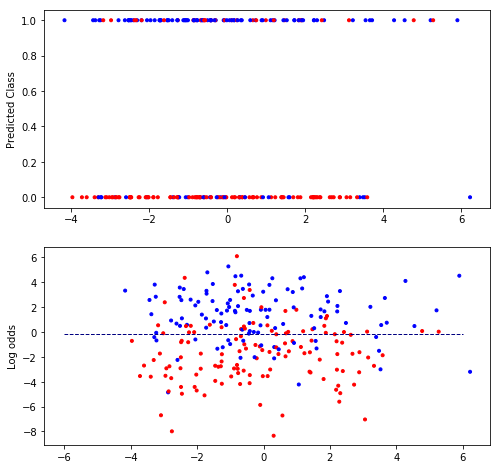

In [14]:
f, axarr = plt.subplots(2, figsize=(8,8))
axarr[0].scatter(X_test[:, 0], predictions, marker='.', c=cmap(y_test))
axarr[0].set_ylabel('Predicted Class')
# logreg.decision_function(x)
axarr[1].scatter(X_test[:, 0], decision_function, marker='.', c=cmap(y_test))
axarr[1].plot([-6,6], [logreg.intercept_, logreg.intercept_], color='navy', lw=1, linestyle='--')
axarr[1].set_ylabel('Log odds')

print("Training accuracy: " + str(scale_logreg.score(X_train, y_train)))
print("Testing accuracy: " + str(scale_logreg.score(X_test, y_test)))

FPR : [0.         0.23622047 1.        ] 
TPR : [0.         0.76106195 1.        ] 
Thr : [2 1 0]
0.7624207372308549


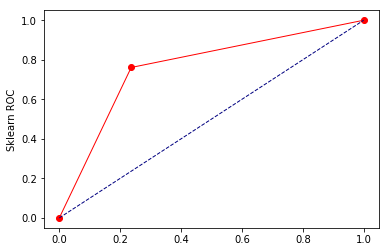

In [15]:
fpr, tpr, thr = metrics.roc_curve(y_test, predictions)
print("FPR : {} \nTPR : {} \nThr : {}".format(fpr, tpr, thr))
plt.plot(fpr, tpr, 'ro-', lw=1)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.ylabel('Sklearn ROC')

print(metrics.roc_auc_score(y_test, predictions))

[[97 30]
 [27 86]]


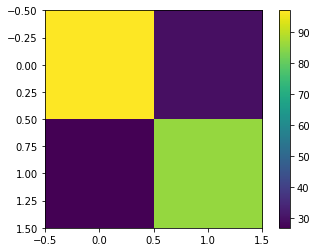

In [16]:
# Rows: Predicted
# Columns: Actual
conf_mat = metrics.confusion_matrix(y_test, predictions)
plt.imshow(conf_mat)
plt.colorbar()
print(metrics.confusion_matrix(y_test, predictions))

## Why ROC?

This is a very common scenario that will occur when you are assessing model performance. Run the above procedure on the dataset below:

In [17]:
import pandas as pd
ds = pd.read_csv("roc_data.csv")

In [18]:
y = ds.iloc[:, 0]
X = ds.iloc[:, 1:]
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2)

In [19]:
scale_logreg.fit(X_train, y_train)
predictions = scale_logreg.predict(X_test)

Training accuracy: 0.9526515151515151
Testing accuracy: 0.803030303030303


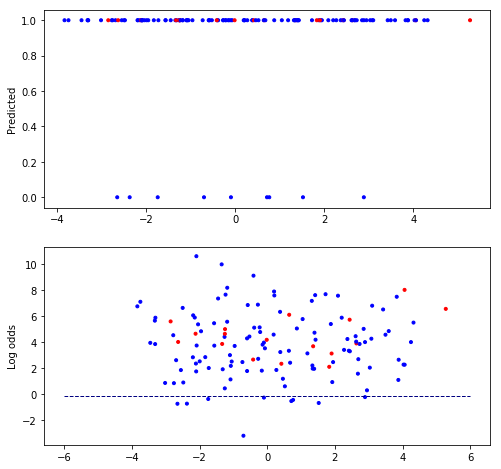

In [20]:
f, axarr = plt.subplots(2, figsize=(8,8))
axarr[0].scatter(X_test.iloc[:, 0], predictions, marker='.', c=cmap(y_test))
axarr[0].set_ylabel('Predicted')
# logreg.decision_function(x)
axarr[1].scatter(X_test.iloc[:, 0], scale_logreg.decision_function(X_test)
                 , marker='.', c=cmap(y_test))
axarr[1].plot([-6,6], [logreg.intercept_, logreg.intercept_], color='navy', lw=1, linestyle='--')
axarr[1].set_ylabel('Log odds')

print("Training accuracy: " + str(scale_logreg.score(X_train, y_train)))
print("Testing accuracy: " + str(scale_logreg.score(X_test, y_test)))

THR: [2. 1. 0.]
FPR: [0. 1. 1.]
TPR: [0.         0.92173913 1.        ]


Text(0,0.5,'Sklearn ROC')

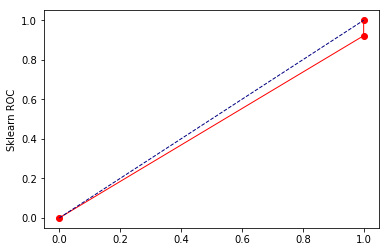

In [21]:
fpr, tpr, thr = metrics.roc_curve(y_test, predictions)
print("THR: {}\nFPR: {}\nTPR: {}".format(thr, fpr, tpr))
plt.plot(fpr, tpr, 'ro-', lw=1)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.ylabel('Sklearn ROC')

[[  0  17]
 [  9 106]]


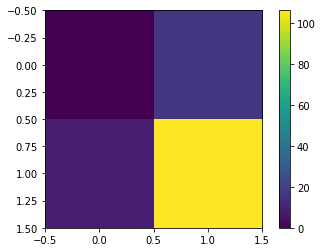

In [22]:
conf_mat = metrics.confusion_matrix(y_test, predictions)
plt.imshow(conf_mat)
plt.colorbar()
print(metrics.confusion_matrix(y_test, predictions))

What do you think happened and why?